In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False  # 그래프에서 한글 출력을 위한 코드
plt.rcParams['font.family'] = 'Malgun Gothic'  # 그래프에서 한글 출력을 위한 코드

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
mpg = sns.load_dataset('mpg')

- 1) Iris - sns.load_dataset('iris')  
 
    - a. 붓꽃 종(species)별로 꽃잎길이(sepal_length), 꽃잎폭(sepal_width), 
* 꽃받침길이(petal_length), 꽃받침폭(petal_width)의 평균, 표준편차 등  
* 기초통계량(describe())을 구하시오. 
 
    - b. 3분위수(Q3)와 1분위수(Q1)의 차이보다 1.5배가 크거나 작은 데이터는 이상치이다. 
* 즉, 
    * Q1 - 1.5 * (Q3 - Q1) 보다 작은 데이터 
    * Q3 + 1.5 * (Q3 - Q1) 보다 큰 데이터 
 
- 이 이상치를 제거하고 위의 4가지 항목에 대해서 평균, 표준편차를 구하시오.

In [3]:
# 1-a
iris.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [4]:
iris.groupby('species').agg(['mean','std'])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

In [5]:
s = iris[iris.species == 'setosa']

In [6]:
# b 이상치 제거
s = iris[iris.species == 'setosa']['sepal_width']
q1, q3 = s.quantile(0.25), s.quantile(0.75)
iqr = q3 - q1
q1, q3, iqr

(3.2, 3.6750000000000003, 0.4750000000000001)

In [7]:
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
s[(s < lower) | (s > upper)] = np.nan
s.isna().sum()

2

In [8]:
s.mean(), s.std()

(3.4312500000000004, 0.32034306743094015)

In [9]:
# 한 품종의 피쳐를 받아서 이상치를 제거하고 평균, 표준편차, 이상치 갯수를 반환하는 함수
def get_new_stat(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    s[(s < lower) | (s > upper)] = np.nan
    return s.isna().sum(), s.mean(), s.std()

In [10]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
for species in iris.species.unique():          # ['setosa', 'versicolor','verginica']
    for feature in iris.columns[:-1]:
        s = iris[iris.species == species][feature]
        outlier, new_mean, new_std = get_new_stat(s)
        print(outlier, new_mean, new_std)

0 5.005999999999999 0.3524896872134512
2 3.4312500000000004 0.32034306743094015
4 1.4608695652173913 0.12906201931985212
2 0.23333333333333328 0.08588298157855664
0 5.936 0.5161711470638635
0 2.7700000000000005 0.3137983233784114
1 4.285714285714285 0.4377975178854565
0 1.3259999999999998 0.197752680004544
1 6.6224489795918355 0.593459246748267
3 2.95531914893617 0.26027452951125174
0 5.552 0.5518946956639835
0 2.026 0.27465005563666733


In [13]:
ss = pd.Series([1,2,3,4,5,6,7,8])
ss[(ss < 3) | (ss > 6)]

0    1
1    2
6    7
7    8
dtype: int64

In [14]:
line = []
for species in iris.species.unique():
    for feature in iris.columns[:-1]:
        s = iris[iris.species == species][feature]
        old_mean, old_std = round(s.mean(),3), round(s.std(),4)
        outlier, new_mean, new_std = get_new_stat(s)
        d = {'species':species, 'feature':feature, 'old mean':old_mean, 'old std':old_std,
             'outlier갯수':outlier, 'new mean':round(new_mean,3), 'new std':round(new_std,4)}
        line.append(d)
df = pd.DataFrame(line)
df.set_index(['species','feature'], inplace=True)
df

old mean  old std  outlier갯수  new mean  new std
species    feature                                                      
setosa     sepal_length     5.006   0.3525          0     5.006   0.3525
           sepal_width      3.428   0.3791          2     3.431   0.3203
           petal_length     1.462   0.1737          4     1.461   0.1291
           petal_width      0.246   0.1054          2     0.233   0.0859
versicolor sepal_length     5.936   0.5162          0     5.936   0.5162
           sepal_width      2.770   0.3138          0     2.770   0.3138
           petal_length     4.260   0.4699          1     4.286   0.4378
           petal_width      1.326   0.1978          0     1.326   0.1978
virginica  sepal_length     6.588   0.6359          1     6.622   0.5935
           sepal_width      2.974   0.3225          3     2.955   0.2603
           petal_length     5.552   0.5519          0     5.552   0.5519
           petal_width      2.026   0.2747          0     2.026   0.2747

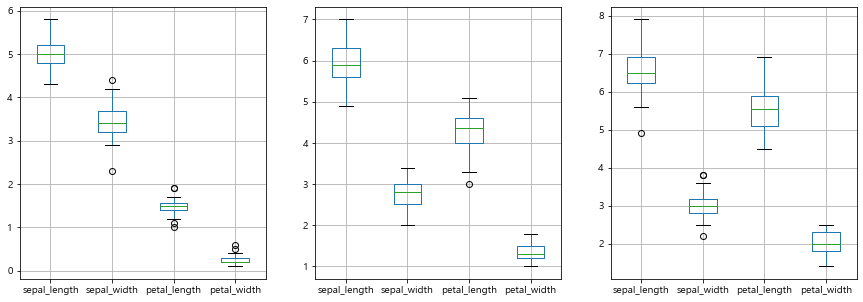

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(131)        # 행의 갯수, 열의 갯수, 몇번 째
iris[iris.species == 'setosa'].boxplot()
plt.subplot(1, 3, 2)        # 행의 갯수, 열의 갯수, 몇번 째
iris[iris.species == 'versicolor'].boxplot()
plt.subplot(133)        # 행의 갯수, 열의 갯수, 몇번 째
iris[iris.species == 'virginica'].boxplot()
plt.show()

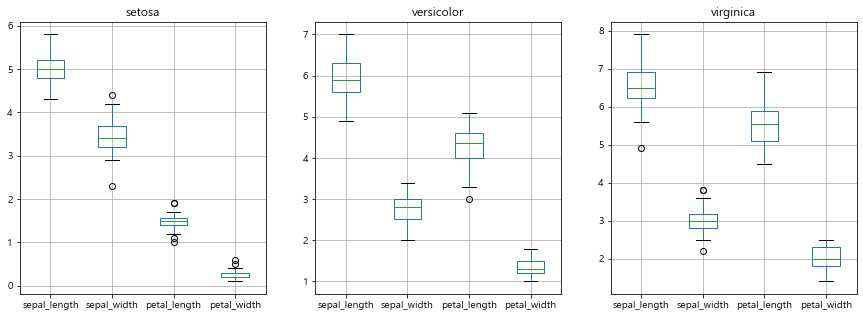

In [16]:
plt.figure(figsize=(15, 5))

for i, species in enumerate(iris.species.unique()):
    plt.subplot(1, 3, i+1)
    plt.title(species)
    iris[iris.species == species].boxplot()
plt.show()

### 2) Titanic - sns.load_dataset('titanic') 
 
- a. 타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 category1 열을 만드시오. 
* category1 카테고리는 다음과 같이 정의됨  
    - 1) 20살이 넘으면 성별을 그대로 사용한다. 
    - 2) 20살 미만이면 성별에 관계없이 “child”라고 한다. 


- b. 타이타닉호의 승객 중 나이를 명시하지 않은 고객은 
* 나이를 명시한 고객의 평균 나이값이 되도록 titanic 데이터프레임을 고치시오. 


- c. 성별, 선실(class)별, 출발지(embark_town)별 생존율을 구하시오. 

In [17]:
# a
titanic['category1'] = titanic.apply(lambda x: x.sex if x.age >= 20 else 'child', axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


In [18]:
# b. 타이타닉호의 승객 중 나이를 명시하지 않은 고객은 
# 나이를 명시한 고객의 평균 나이 값이 되도록 titanic 데이터프레임을 고치시오.
titanic['age'] = titanic.age.fillna(titanic.age.mean())
titanic['category1'] = titanic.apply(lambda x: x.sex if x.age >= 20 else 'child', axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


In [19]:
# c. 성별, 선실(class)별, 출발지(embark_town)별 생존율을 구하시오.
# survived의 평균 --> 생존률
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [20]:
titanic.groupby('embark_town')['survived'].mean()

embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: survived, dtype: float64

In [21]:
titanic.groupby(['sex','pclass'])['survived'].mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

- 3) Mile Per Gallon - sns.load_dataset('mpg') 
 
    - a. 배기량(displacement) 대비 마력(horsepower) 열(hp_per_cc)을 추가하시오. 
 
    - b. name으로부터 manufacturer(제조사)와 모델을 추출하여  
    * 새로운 열 manufacturer와 model을 추가하고, name 열은 삭제하시오. 
 
    - c. 엔진의 실린더(cylinders) 갯수별 연비(mpg)의 평균을 구하시오. 
 
    - d. 생산지(origin)별 배기량 대비 마력(hp_per_cc)의 평균을 구하시오. 
 
    - e. 모델이 5개 이상인 제조사에 대하여  
    * 연비(mpg)의 평균이 가장 좋은 제조사 Top 5를 구하시오.

In [45]:
mpg = sns.load_dataset('mpg')

In [46]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [47]:
name = 'chevrolet chevelle malibu'
mfg = name.split()[0]
mfg

'chevrolet'

In [48]:
name2 = 'ford torino'
model = name.split()[1:]
model

['chevelle', 'malibu']

In [49]:
' '.join(name.split()[1:])

'chevelle malibu'

In [50]:
' '.join(name2.split()[1:])

'torino'

In [51]:
#a. 배기량(displacement) 대비 마력(horsepower) 열(hp_per_cc)을 추가하시오.
mpg['hp_per_cc'] = mpg.horsepower / mpg.displacement
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.423453
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.471429
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.471698
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.493421
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.463576


In [52]:
# b. name으로부터 manufacturer(제조사)와 모델을 추출하여 새로운 열 manufacturer와 model을 추가하고, name 열은 삭제하시오.
mpg['ma'] = mpg.name.apply(lambda x: x.split()[0])
mpg['model'] = mpg.name.apply(lambda x: ' '.join(x.split()[1:]))
mpg.drop(columns=['name'], inplace=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,ma,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.423453,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.471429,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.471698,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.493421,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.463576,ford,torino


In [53]:
# c. 엔진의 실린더(cylinders) 갯수별 연비(mpg)의 평균을 구하시오.
mpg.groupby('cylinders')['mpg'].mean()

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

In [54]:
# d. 생산지(origin)별 배기량 대비 마력(hp_per_cc)의 평균을 구하시오.
mpg.groupby('origin')[['mpg']].mean()

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


In [55]:
# e. 모델이 5개 이상인 제조사에 대하여 연비(mpg)의 평균이 가장 좋은 제조사 Top 5를 구하시오.
mpg.ma.value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
vw                6
renault           5
opel              4
saab              4
subaru            4
chevy             3
maxda             2
bmw               2
cadillac          2
mercedes-benz     2
capri             1
hi                1
triumph           1
vokswagen         1
toyouta           1
chevroelt         1
nissan            1
mercedes          1
Name: ma, dtype: int64

In [56]:
s = mpg.ma.value_counts()
s[s >= 5]

ford          51
chevrolet     43
plymouth      31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
honda         13
mercury       11
oldsmobile    10
mazda         10
fiat           8
peugeot        8
audi           7
volvo          6
chrysler       6
vw             6
renault        5
Name: ma, dtype: int64

In [57]:
big = s[s >= 5].index
big

Index(['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'oldsmobile',
       'mazda', 'fiat', 'peugeot', 'audi', 'volvo', 'chrysler', 'vw',
       'renault'],
      dtype='object')

In [58]:
'ford' in big

True

In [59]:
mpg.ma.isin(big).tail()

393     True
394     True
395     True
396     True
397    False
Name: ma, dtype: bool

In [60]:
big_mpg = mpg[mpg.ma.isin(big)]
big_mpg.groupby('ma')['mpg'].mean().sort_values(ascending=False).head(5)

ma
vw         39.016667
honda      33.761538
renault    32.880000
datsun     31.113043
mazda      30.860000
Name: mpg, dtype: float64